### Machine Leanrning model to predict the level of education of midwives

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the data into a DataFrame

In [56]:
sage_df = pd.read_csv("data/Sage_Femme.csv")
region_df = pd.read_csv("data/Region.csv")
# region_df = pd.read_csv("data/Region_with_correlated_data.csv")
display(region_df.head())

,id,nom,number_hospitals,access_water,number_of_sage_femme,number_of_sage_femme_10000,maternal_mortality_rate,access_to_education
0,1,Alibori,5,0.215975,35,0.4,118,0.512325
1,2,Atakora,8,0.453408,52,0.6,110,0.631886
2,3,Atlantique,11,0.960765,268,1.7,71,0.871950
3,4,Borgou,6,0.268418,136,1.0,66,0.511501
4,5,Collines,14,0.913586,44,0.6,81,0.956687


### 

In [57]:
# All sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#### Heat maps for both the dataframes to check for  correlation

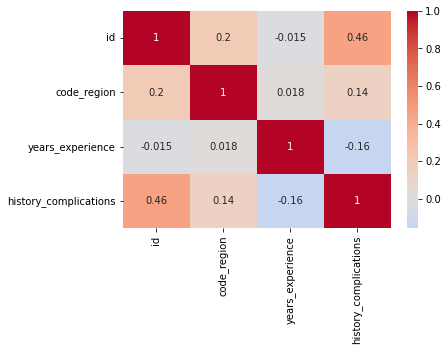

In [58]:

# sage dataframe
sage_corr = sage_df.corr()
sns.heatmap(sage_corr, cmap="coolwarm", annot=True, center=0);


In [78]:
# Convert the sage_femme_data dictionary into a numpy array
data = np.array([sage_df["history_complications"], sage_df["level_education"]]).T

# Split the data into input features (X) and output label (y)
X = data[:, 0].reshape(-1, 1)
y = data[:, 1]

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Choose the KNN algorithm and train a model on the training data
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test data and evaluate the model's performance
y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.16666666666666666


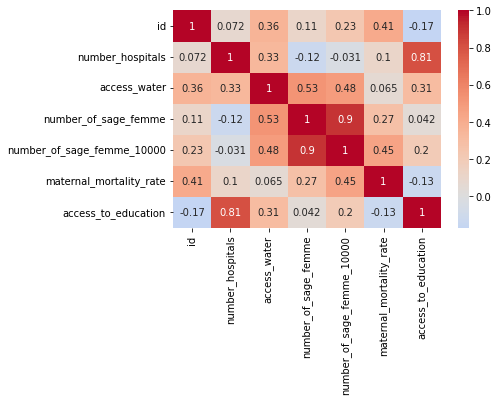

In [59]:
#  regions dataframe
corr = region_df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True, center=0);

In [74]:
# Define the features and target variable
features = ["number_of_sage_femme_10000", "number_hospitals", "access_water", "access_to_education"]
target = "maternal_mortality_rate"

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    region_df[features], region_df[target], test_size=0.2
)

# Create a random forest regressor
model = RandomForestRegressor()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
print(y_pred)


# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

[ 90.43 112.89  85.64]
Root Mean Squared Error: 64.16314258721019
